In [56]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests

In [57]:
from citipy import citipy

In [58]:
from datetime import datetime

In [59]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [60]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [61]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28114e72efd45e99541c3b198888e251


In [62]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28114e72efd45e99541c3b198888e251&q=Boston


In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [64]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [66]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        # Run an API request for each of the cities.
    # Parse the JSON and retrieve data.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
      
    
    

Processing Record 5 of Set 2 | puerto escondido
Processing Record 6 of Set 2 | dodge city
Processing Record 7 of Set 2 | busselton
Processing Record 8 of Set 2 | great bend
Processing Record 9 of Set 2 | piet retief
Processing Record 10 of Set 2 | chapada dos guimaraes
Processing Record 11 of Set 2 | bullhead city
Processing Record 12 of Set 2 | morros
Processing Record 13 of Set 2 | luau
Processing Record 14 of Set 2 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 2 | portsmouth
Processing Record 16 of Set 2 | saint george
Processing Record 17 of Set 2 | ushuaia
Processing Record 18 of Set 2 | panaba
Processing Record 19 of Set 2 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 2 | kapaa
Processing Record 21 of Set 2 | deputatskiy
Processing Record 22 of Set 2 | qaanaaq
Processing Record 23 of Set 2 | ouro fino
Processing Record 24 of Set 2 | wichian buri
Processing Record 25 of Set 2 | punta arenas
Processing Record 26 of Set 2 | tukt

Processing Record 39 of Set 5 | poum
Processing Record 40 of Set 5 | mount isa
Processing Record 41 of Set 5 | vilyuysk
Processing Record 42 of Set 5 | arman
Processing Record 43 of Set 5 | macomb
Processing Record 44 of Set 5 | chegdomyn
Processing Record 45 of Set 5 | otane
Processing Record 46 of Set 5 | rabo de peixe
Processing Record 47 of Set 5 | lilongwe
Processing Record 48 of Set 5 | wanaka
Processing Record 49 of Set 5 | mandalgovi
Processing Record 50 of Set 5 | saint-pierre
Processing Record 1 of Set 6 | evensk
Processing Record 2 of Set 6 | santa cruz
Processing Record 3 of Set 6 | ponta do sol
Processing Record 4 of Set 6 | chicama
Processing Record 5 of Set 6 | ulundi
Processing Record 6 of Set 6 | mahebourg
Processing Record 7 of Set 6 | nome
Processing Record 8 of Set 6 | mogadishu
Processing Record 9 of Set 6 | katsuura
Processing Record 10 of Set 6 | hashtrud
Processing Record 11 of Set 6 | porto novo
Processing Record 12 of Set 6 | samarai
Processing Record 13 of Se

Processing Record 27 of Set 9 | esperance
Processing Record 28 of Set 9 | chagda
City not found. Skipping...
Processing Record 29 of Set 9 | maria la baja
Processing Record 30 of Set 9 | sarangani
Processing Record 31 of Set 9 | san luis
Processing Record 32 of Set 9 | cortez
Processing Record 33 of Set 9 | tiznit
Processing Record 34 of Set 9 | storforshei
Processing Record 35 of Set 9 | jalu
Processing Record 36 of Set 9 | petropavlovsk-kamchatskiy
Processing Record 37 of Set 9 | iquique
Processing Record 38 of Set 9 | mehamn
Processing Record 39 of Set 9 | utiroa
City not found. Skipping...
Processing Record 40 of Set 9 | kisangani
Processing Record 41 of Set 9 | nowy sacz
Processing Record 42 of Set 9 | atar
Processing Record 43 of Set 9 | bawku
Processing Record 44 of Set 9 | margate
Processing Record 45 of Set 9 | isangel
Processing Record 46 of Set 9 | shubarkuduk
Processing Record 47 of Set 9 | wilmington
Processing Record 48 of Set 9 | moose factory
Processing Record 49 of Set

Processing Record 12 of Set 13 | ngawen
Processing Record 13 of Set 13 | jijiang
Processing Record 14 of Set 13 | shagonar
Processing Record 15 of Set 13 | santa lucia
Processing Record 16 of Set 13 | nyagan
Processing Record 17 of Set 13 | auki
Processing Record 18 of Set 13 | warmbad
Processing Record 19 of Set 13 | segezha
Processing Record 20 of Set 13 | suleja
Processing Record 21 of Set 13 | tubruq
City not found. Skipping...
Processing Record 22 of Set 13 | ambon
Processing Record 23 of Set 13 | kavaratti
Processing Record 24 of Set 13 | bara
Processing Record 25 of Set 13 | carauari
Processing Record 26 of Set 13 | galle
Processing Record 27 of Set 13 | kyra
Processing Record 28 of Set 13 | kolyvan
Processing Record 29 of Set 13 | madimba
Processing Record 30 of Set 13 | aborlan
Processing Record 31 of Set 13 | malwan
City not found. Skipping...
Processing Record 32 of Set 13 | edson
Processing Record 33 of Set 13 | agadez
Processing Record 34 of Set 13 | shimoda
Processing Rec

In [69]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Escondido,15.85,-97.07,86.0,70,20,6.93,MX,2020-10-19 19:00:50
1,Dodge City,37.75,-100.02,50.0,39,75,3.36,US,2020-10-19 18:58:20
2,Busselton,-33.65,115.33,57.0,71,0,9.24,AU,2020-10-19 18:59:34
3,Great Bend,38.36,-98.76,52.0,49,90,9.17,US,2020-10-19 19:00:51
4,Piet Retief,-27.01,30.81,70.7,56,37,4.16,ZA,2020-10-19 19:00:51


In [73]:
new_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_columns]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Escondido,MX,2020-10-19 19:00:50,15.85,-97.07,86.0,70,20,6.93
1,Dodge City,US,2020-10-19 18:58:20,37.75,-100.02,50.0,39,75,3.36
2,Busselton,AU,2020-10-19 18:59:34,-33.65,115.33,57.0,71,0,9.24
3,Great Bend,US,2020-10-19 19:00:51,38.36,-98.76,52.0,49,90,9.17
4,Piet Retief,ZA,2020-10-19 19:00:51,-27.01,30.81,70.7,56,37,4.16


In [75]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [76]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [77]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603134902.228532

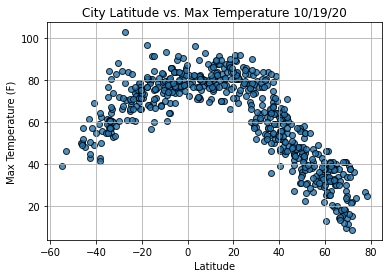

In [78]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

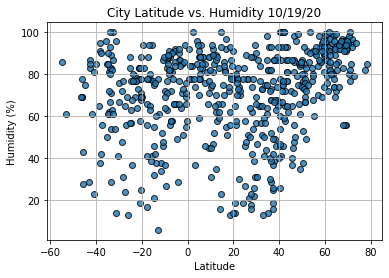

In [79]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

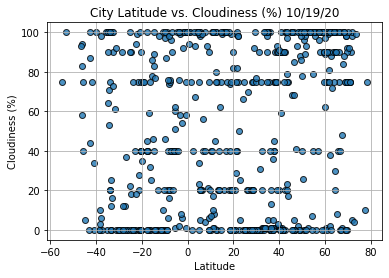

In [80]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

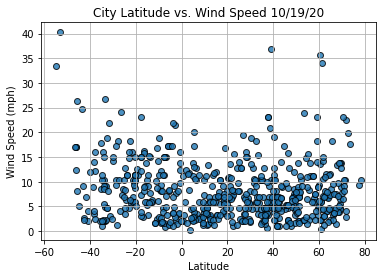

In [81]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()